# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
DATA_FOLDER = r'C:\Users\antho\Documents\GitHub\ADA_EPFL\ADA2018-Homework-master/01 - Pandas and Data Wrangling/data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [29]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [30]:
#Data declarations
sets = pd.read_csv(LEGO_DATA_FOLDER + "/sets.csv.zip")
colors = pd.read_csv(LEGO_DATA_FOLDER + "/colors.csv.zip")
inventories = pd.read_csv(LEGO_DATA_FOLDER + "/inventories.csv.zip")
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_sets.csv.zip")
part_categories = pd.read_csv(LEGO_DATA_FOLDER + "/part_categories.csv.zip")
parts = pd.read_csv(LEGO_DATA_FOLDER + "/parts.csv.zip")
themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip")

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [31]:
#print first few rows of year column
sets.year.head()

0     70s
1    1978
2    1987
3    1979
4    1979
Name: year, dtype: object

In [32]:
#identify unique year values
sets.year.unique()

array(['70s', '1978', '1987', '1979', '19788', '1976', '1965', '1985',
       '1968', '1999', '1967', '1969', '2001', '20011', '1966', '2003',
       '2002', '20022', '-2003', '20033', '-2002', '20044', '2004',
       '2006', '20055', '2005', '-2004', '-2006', '-2010', '-2005',
       '20066', '2007', '20077', '2008', '20088', '-2009', '2009',
       '20099', '2010', '20100', '-2011', '2011', '20111', '2012',
       '20122', '-2013', '2013', '20133', '20144', '-20144', '2015',
       '2014', '-2014', '20155', '-2015', '2016', '20166', '-2016',
       '2017', '1977', '1983', '1986', '1984', '1973', '-2012', '-20155',
       '1981', '-2000', '80s', '1982', '1988', '20177', '-2017', '-1999',
       '19999', '-1986', '1997', '1998', '1971', '-1966', '-1977',
       '-1981', '-1985', '20000', '2000', '-20000', '1955', '1956',
       '1957', '-1982', '-1969', '19822', '19555', '1958', '-2001',
       '1974', '1972', '19988', '-1998', '19877', '19855', '19777',
       '1975', '-1987', '-1979'

<u><b><font color='green'>ANSWERS:</font></b></u><br><br>

As we see, there are some invalid year entries in sets dataset. For example, there are some negative years and 5 digit years. As well as entries like 70s and 80s instead of 1970 and 1980

In [33]:
#replacing 70s and 80s to 1970 and 1980
sets.replace(to_replace='70s',value='1970', inplace=True)
sets.replace(to_replace='80s',value='1980',inplace=True)
sets.year = sets.year.astype(int)
#taking absolute value
sets.year = abs(sets.year)
#fixing typing error for 5 digits numbers, example: 19555//10 = 1955
sets.year[sets['year'].astype(str).str.len() == 5] = sets.year[sets['year'].astype(str).str.len() == 5]//10
'''
unionA = sets.loc[:,"year" ].copy() 
unionA[unionA > 0] = 0
unionA = unionA*(-1)
unionB = sets.loc[:,"year" ].copy()
unionB[unionB < 0] = 0

year = unionB + unionA

u0 = year.copy()
u1 = year.copy()
u0[u0 < 10000] = 0
u1[u1 > 10000] = 0
u0 = u0//10

c_year = u0 + u1 

sets.year = c_year
'''
sets.year.unique()

C:\Users\antho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([1970, 1978, 1987, 1979, 1976, 1965, 1985, 1968, 1999, 1967, 1969,
       2001, 1966, 2003, 2002, 2004, 2006, 2005, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1977, 1983, 1986, 1984,
       1973, 1981, 2000, 1980, 1982, 1988, 1997, 1998, 1971, 1955, 1956,
       1957, 1958, 1974, 1972, 1975, 1992, 1991, 1989, 1990, 1993, 1994,
       1996, 1995, 1959, 1962, 1961, 1960, 1963, 1964, 1950, 1953, 1954],
      dtype=int64)

In [34]:
inventory_parts.quantity.mean() #display -inf
#inventory_parts.quantity = inventory_parts.quantity.astype(int) # to integer , -inf is transformed into -2147483648
#Cleaned inventory parts
c_inventory_parts = inventory_parts[inventory_parts.quantity >= 0] 
c_inventory_parts.quantity

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          1.0
8          1.0
10         1.0
11         4.0
12         1.0
13         1.0
14         1.0
16         5.0
17         3.0
18         1.0
19         1.0
20         1.0
21         1.0
22         1.0
23         3.0
25         1.0
26         1.0
27         1.0
28         1.0
29         4.0
30         1.0
31         1.0
32         1.0
          ... 
580214     1.0
580215     1.0
580216     1.0
580217     4.0
580221     4.0
580224     1.0
580225     4.0
580226     8.0
580227     6.0
580228    10.0
580229     6.0
580231     4.0
580232     4.0
580234     8.0
580235     4.0
580236     1.0
580237     1.0
580238     1.0
580239     1.0
580240     1.0
580241     1.0
580242     1.0
580243     1.0
580244     1.0
580245     1.0
580246     3.0
580247     4.0
580248     4.0
580249     9.0
580250     5.0
Name: quantity, Length: 418455, dtype: float64

Explanation:
sets:year
Some years in the dataset are not possible because the 1st lego was created in 1932.
We can assume that these are typing error, for exemple when the date is -2003, the minus has nothing to do here, it should be 2003.
And when the date is too long like '19955' it should be '1995'.

1- Replace "70s" and "80s" by "1970" and "1980" 
2- Set year type as integer 
3- Make 2 series from the series of year:
        -SerieA :All the negative year -> set all the positive year to 0.
        -SerieB :All the positive year -> set the negative year to 0.

4- Multiply SerieA by -1

5- Add SerieA and SerieB together.

6- Make 2 series from the series of year:
        -SerieA :All the year superior to 10000 -> set all the other year to 0.
        -SerieB :All the year inferior to 10000 -> set all the other year to 0.

7- Divide SerieA by 10 (example: 19955//10 -> 1995)



inventory_parts : quantity
Quantity is supposed to be a natural number, we can't have a 0.5 piece of lego, this would be absurd. But here, quantity's type is float wich is non-sense as we said. 
When there are no information we have -inf.

<br><br><br><br>
NEW VERSION:
<br><br>
<u><b><font color='green'>ANSWERS:</font></b></u><br><br>

<u><b>Explanation:</b></u><br>

<u>sets:</u> year<br>
As the 1st lego was created in 1932, many dates are impossible.
For instance, the negative dates should be positive, typing error: '19955' should be replaced by '1995', etc. 
Please see the following steps to know our transformations:

* Replacing "70s" and "80s" by "1970" and "1980" 
* Taking absolute values 
* Looking for 5 digits values then removing the last digit (example: 19955//10 -> 1995)


<br><u>inventory_parts:</u> quantity<br>
Quantity is supposed to be a natural number, we can't have a 0.5 piece of lego, this would be absurd. But here, quantity's type is float wich is non-sense as we said. 
When there is no information we have -inf.

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

#    A3 . 1    #

In [46]:

cars_part_id = parts.loc[parts['part_cat_id'] == 29].id
cars_inventory_parts = inventory_parts.loc[inventory_parts['part_id'].isin(cars_part_id)].inventory_id

cars_inventory_sets = inventories.loc[inventories['id'].isin(cars_inventory_parts.index)]
cars_inventory_sets
#inventories
#sets.loc[sets['id'].isin(cars_inventory_sets.set_id)]

,id,version
30,51,1
32,54,1
157,227,1
158,228,1
177,255,1
180,259,1
334,483,1
597,865,1
598,866,1
658,954,1



#    A3 . 2    #


In [44]:

Largest_number_part = parts.groupby('part_cat_id').part_cat_id.count().sort_values(ascending=False).head(20)


parts.groupby('part_cat_id').part_cat_id.count()
aligned_part = part_categories.shift(periods=1, freq=None, axis=0)
aligned_part['number'] = (parts.groupby('part_cat_id').part_cat_id.count())
biggest_category = aligned_part.sort_values('number',ascending=False).head(20)

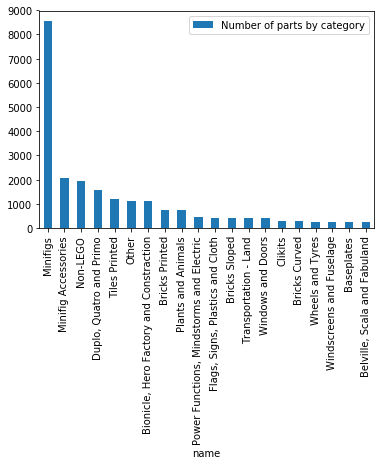

In [45]:
df = pd.DataFrame({"Number of parts by category": Largest_number_part.tolist()}
                 , index=biggest_category.name)
ax = df.plot.bar(rot=90)




#    A3 . 3    #


In [39]:
#cast ids to string
sets.id = sets.id.astype(str)
inventory_sets.inventory_id = inventory_sets.inventory_id.astype(str)
inventory_parts.inventory_id = inventory_parts.inventory_id.astype(str)

#merging sets and inventory sets. Using right join to fetch only the existing id in inventory_sets
merge_sets_Inventory = pd.merge(sets, inventory_sets, how='right',left_on=['id'], right_on=['set_id'])
merge_sets_Inventory_filtered = pd.DataFrame()
merge_sets_Inventory_filtered['set_id'] = merge_sets_Inventory.set_id
merge_sets_Inventory_filtered['inventory_id'] = merge_sets_Inventory.inventory_id
merge_sets_Inventory_filtered['quantity'] = merge_sets_Inventory.quantity

#removing where there is quantity < 1
set_inventory_quantity = merge_sets_Inventory_filtered[(merge_sets_Inventory_filtered['quantity'] > 0)]

#merging until colors dataframe
inventory_inventory = pd.merge(inventory_parts, set_inventory_quantity, how='outer',on=['inventory_id'])
inventory_inventory = inventory_inventory.dropna()
inventory_color = pd.merge(inventory_inventory, colors, how='outer',left_on=['color_id'], right_on=['id'])
inventory_color_filtered = pd.DataFrame()
inventory_color_filtered['set_id'] = inventory_color.set_id
inventory_color_filtered['name'] = inventory_color.name

#Removing No Color and Unknown color from the dataframe
inventory_color_filtered = inventory_color_filtered[inventory_color_filtered['name'] != '[No Color]' ]
inventory_color_filtered = inventory_color_filtered[inventory_color_filtered['name'] != 'Unknown' ]

#grouping by set_ids and colors
groupby_sets = inventory_color_filtered.groupby(['set_id','name']).set_id.count()
#Displaying dataframe
groupby_sets

set_id   name             
10127-1  Black                1
         Blue                 1
         Green                1
         Orange               1
         Red                  1
         White                2
10173-1  Black                4
         Dark Bluish Gray     2
1062-1   Black                3
         Green                1
         Light Gray           4
         Royal Blue           1
         Trans-Green          2
         Trans-Red            2
         Trans-Yellow         1
         White                8
1064-1   Black                3
         Green                1
         Light Gray           4
         Royal Blue           1
         Trans-Green          2
         Trans-Red            2
         Trans-Yellow         1
         White                8
1417-2   Red                  1
         Royal Blue           1
2995-1   Royal Blue           1
2996-1   Royal Blue           1
322-1    Red                  1
3404-1   White                1
             

In [40]:
#keeping only the color the most used for each set
groupby_sets = inventory_color_filtered.groupby(['set_id','name']).set_id.count().reset_index(name="count")
index = groupby_sets.groupby(['set_id'])['count'].transform(max) == groupby_sets['count']
color_sets = groupby_sets[index]

We are looking for part for the construction of lego car. 
In the part_categories we search for something that is only or mostly on car.
We found the category Wheels and Tyres: id=29.
Then look in the inventory_part for inventory_id with part = 29
In inventory_sets we count the number of set with inventory_id corresponding to 29

<br><br><br><br>
NEW VERSION:
<br><br>
<u><b><font color='green'>ANSWERS:</font></b></u><br><br>


<u>Lego car parts:</u><br>
In the part_categories we looked for something that is only or mostly on cars.
We found the category Wheels and Tyres: id=29.
Then, we selected in the inventory_part: inventory_id with part = 29
In inventory_sets, we count the number of sets with inventory_id = 29


#    A3 . 4    #

In [41]:
#merge the dataframe above with corresponding rbg to the name of the color
color_set_rgb = pd.merge(color_sets, colors, how='inner',left_on=['name'], right_on=['name'])
#Merge the dataframe above with sets, to get year for each set_id
color_set_rgb_year =  pd.merge(color_set_rgb, sets, how='inner',left_on=['set_id'], right_on=['id'])

#extract and convert R, G and B from string to int from rgb of each set
color_set_rgb_year['R'] =  color_set_rgb_year.rgb.apply(lambda x:(int(x[0:2], 16) )) #R 
color_set_rgb_year['G'] =  color_set_rgb_year.rgb.apply(lambda x:(int(x[2:4], 16) )) #G
color_set_rgb_year['B'] =  color_set_rgb_year.rgb.apply(lambda x:(int(x[4:6], 16) )) #B

#Luminance
color_set_rgb_year['Lum'] =np.sqrt(0.299* color_set_rgb_year.R* color_set_rgb_year.R + 0.587*color_set_rgb_year.G*color_set_rgb_year.G + 0.114*color_set_rgb_year.B*color_set_rgb_year.B)

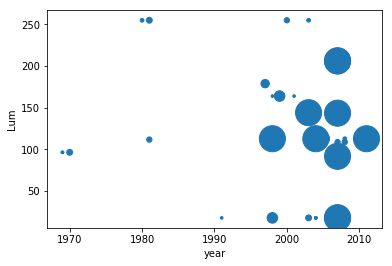

In [42]:
color_set_rgb_year.sort_values(['year'])
#Display scatter x = year , y = luminance, and the size is proportional to number of sets per year
color_set_rgb_year.plot.scatter('year', 'Lum' ,color_set_rgb_year.groupby('year').year.count()*7) 


## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [19]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [20]:
#read json zip file into data frame
bike_share_trip = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")
#bike_share_trip = df_metroBike.sort_values('Bike ID')
bike_share_trip.head()
#ToDo change name of processed data set in coming excercise

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [21]:
#describing types of attributes
bike_share_trip.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

In [22]:
#describing attributes
bike_share_trip.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [23]:
cols = df_metroBike.columns
print(cols)
#fetching numerical columns
numerical_cols = df_metroBike._get_numeric_data().columns
print(numerical_cols)
#getting categorical columns
categorical_cols = list(set(cols) - set(numerical_cols))
#Displaying Categorical attributes
categorical_cols

NameError: name 'df_metroBike' is not defined

In [ ]:
#ToDO change catoegories dgeebi gza da parolis tipi

In [ ]:
#Tranforming non-numerical columns to category in order to transform it afterwards
for cols in categorical_cols:
    df_metroBike[cols] = df_metroBike[cols].astype('category')

In [ ]:
#transforming categorical values thanks to cat.codes
categorical_cols = df_metroBike.select_dtypes(include=['category']).columns
df_metroBike[categorical_cols] = df_metroBike[categorical_cols].apply(lambda x: x.cat.codes)
df_metroBike.head(10)

In [ ]:
#Extracting redundant columns based on the analysis explained in Output[209]
redudant_columns = ['Duration','Plan Duration','Ending Station Latitude','Ending Station Longitude','Starting Station Latitude','Starting Station Latitude']
df_metroBike_redundancy = df_metroBike[redudant_columns]
df_metroBike_redundancy.head(20)

In [ ]:
#Create dataframe without redundancy
df_metroBike_withoutRedundancy = df_metroBike
df_metroBike_withoutRedundancy.drop(df_metroBike_withoutRedundancy.columns[[1, 2]], axis=1, inplace=True)
df_metroBike_withoutRedundancy.head(20)

In [ ]:
#Displaying dataframe redundancy types
df_metroBike_redundancy.dtypes

In [ ]:
#Displaying dataframe redundancy shape
df_metroBike_redundancy.shape

In [ ]:
#Displaying dataframe redundancy types
df_metroBike_withoutRedundancy.dtypes

In [ ]:
#Displaying dataframe redundancy shape
df_metroBike_withoutRedundancy.shape

<u><b><font color='green'>ANSWERS:</font></b></u><br><br>

<u><b>Redundant columns:</b></u><br>

* Duration column is the total second between start time and end time<br>
* Plan duration is the number of days in the plan, it depends of the PassHolder Type
Monthly -> 30, Flex Pass -> 365<br>
* Ending and Starting station Longitude Latitude only depends of the Ending and Starting station ID
There would be a table that reference the station with Station ID and their latitude / longitude<br>
*!! round trip blabalbal !!!! ToDo
<u><b>Redundant columns pitfalls:</b></u><br>

Having redundant columns is a poor design, instead of doing that we should have other tables that reference primary and foreign keys. Thanks to a such design, we have only one table to update when there is a change. 

For instance, if a station moves to another localisation we will update its longitude/latitude in the Station table, but it won't be updated in this table.

### B3. Querying Phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

### B3. Querying Phase Solutions

<h3 align="center"> B3.1 </h3> 
Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).

In [ ]:
bike_share_trip.head()

In [ ]:
bike_share_trip_grouped = bike_share_trip.groupby('Starting Station ID')
#for bike, group in df_metroBike_grouped:
 #   print('bike', bike)
  #  print('group', group)
bike_share_trip_grouped.size().head()
hist = bike_share_trip_grouped.size().hist(bins=20)
hist.set_xlabel("Number of bikes leaving from station")
hist.set_ylabel("Number of Stations")
hist.set_title("insert title")

In [ ]:
bike_share_trip_grouped = bike_share_trip.groupby('Starting Station ID').size().reset_index(name='counts')
#print(df_metroBike_grouped)
hist = bike_share_trip_grouped['counts'].hist(bins=20)
hist.set_xlabel("Number of bikes leaving from station")
hist.set_ylabel("Number of Stations")
hist.set_title("insert title")

Description:
blqblqblqblq
    

<h3 align="center"> B3.2 </h3> 
Plot histograms for the duration and trip starting hour in the day attributes. For both the duration and the trip starting hour use discrete 1-hour intervals. What do you observe in each plot? What are some popular values in the duration plot? Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior

<b>a)<b> Plot histogram for the duration attribute using descrete 1-hour intervals. What do you observer in the plot? What are some popular values?

In [24]:
bike_share_trip.Duration.describe()

count    132427.000000
mean       1555.301562
std        5814.241813
min          60.000000
25%         360.000000
50%         600.000000
75%        1080.000000
max       86400.000000
Name: Duration, dtype: float64

In [25]:
(bike_share_trip.Duration/3600).describe()

count    132427.000000
mean          0.432028
std           1.615067
min           0.016667
25%           0.100000
50%           0.166667
75%           0.300000
max          24.000000
Name: Duration, dtype: float64

In [26]:
pd.cut(bike_share_trip.Duration, np.arange(0, 86401, 3600)).head()

0         (0, 3600]
1         (0, 3600]
2         (0, 3600]
3    (10800, 14400]
4         (0, 3600]
Name: Duration, dtype: category
Categories (24, interval[int64]): [(0, 3600] < (3600, 7200] < (7200, 10800] < (10800, 14400] ... (72000, 75600] < (75600, 79200] < (79200, 82800] < (82800, 86400]]

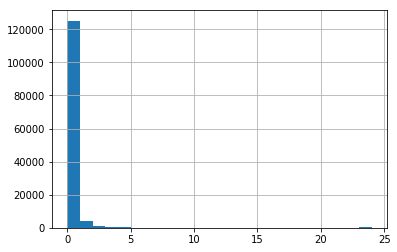

In [27]:
(bike_share_trip.Duration/3600).hist(bins=np.arange(0, 25, 1))

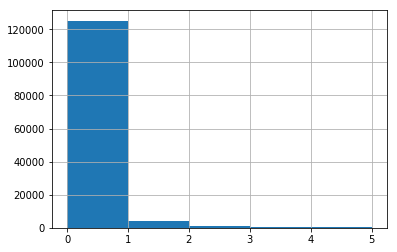

In [28]:
#(bike_share_trip.Duration/3600).hist(bins=np.arange(0, 25, 1), )
#(bike_share_trip.Duration/3600).apply().hist(bins=np.arange(0, 25, 1))
(bike_share_trip.Duration/3600).hist(range=(0,5), bins = [0, 1, 2, 3, 4, 5])

In [29]:
#ToDo add end time - start time column for discussion

<b>b)<b> Plot histogram for trip starting hour in the day attribute using descrete 1-hour intervals. What do you observer in the plot? Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior

In [30]:
bike_share_trip['Start Time'] = pd.to_datetime(bike_share_trip['Start Time'])
bike_share_trip['Start Time'].dt.time.head()

0    04:17:00
1    06:00:00
2    10:32:00
3    10:37:00
4    12:51:00
Name: Start Time, dtype: object

In [31]:
times = pd.to_datetime(bike_share_trip['Start Time'])
times = (times.dt.hour * 60.0 + times.dt.minute) / 60

In [32]:
times.shape

(132427,)

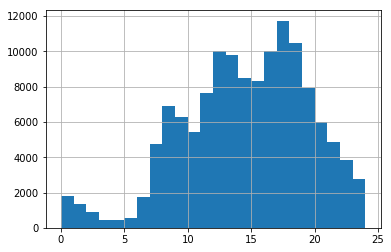

In [33]:
hs = times.hist(bins=np.arange(0, 25, 1) )

Text(0,0.5,'Number of Bikes')

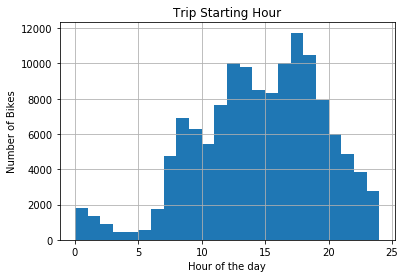

In [34]:
hs = times.plot(title="Trip Starting Hour", kind='hist', bins=np.arange(0, 25, 1), grid=True)
hs.set_xlabel("Hour of the day")
hs.set_ylabel("Number of Bikes")

duration: Length of trip in minutes, but I suspect they are in seconds


<h3 align="center"> B3.3 </h3> 
For each trip route category, calculate the proportion of trips by passholder type and present your results in a stacked bar chart with normalized height

Trip Route Category  Passholder Type
One Way              Flex Pass           9034
                     Monthly Pass       77532
                     Staff Annual         299
                     Walk-up            32777
Round Trip           Flex Pass            483
                     Monthly Pass        3772
                     Staff Annual          83
                     Walk-up             8447
dtype: int64
Passholder Type      Flex Pass  Monthly Pass  Staff Annual  Walk-up
Trip Route Category                                                
One Way                   9034         77532           299    32777
Round Trip                 483          3772            83     8447


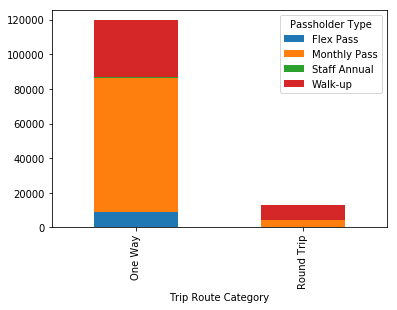

In [35]:
bikes_share_trip_grouped_by_route = bike_share_trip.groupby(['Trip Route Category', 'Passholder Type']).size()

print(bikes_share_trip_grouped_by_route)
print(bikes_share_trip_grouped_by_route.unstack())
bikes_share_trip_grouped_by_route.unstack().plot(kind='bar', stacked=True)

#for category, group in bikes_share_trip_grouped_by_route:
    #print("category", category)
    #print("group", group)
    
#bikes_share_trip_grouped_by_rout
  

#df2[['abuse','nff']].plot(kind='bar', stacked=True)
#bikes_share_trip_grouped_by_route.unstack()

In [36]:
#normalized hieghts aka percent stacked barplot
bike_grouped_proportion = bikes_share_trip_grouped_by_route.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
bike_grouped_proportion

Trip Route Category  Passholder Type
One Way              Flex Pass          0.075509
                     Monthly Pass       0.648033
                     Staff Annual       0.002499
                     Walk-up            0.273959
Round Trip           Flex Pass          0.037779
                     Monthly Pass       0.295033
                     Staff Annual       0.006492
                     Walk-up            0.660696
dtype: float64

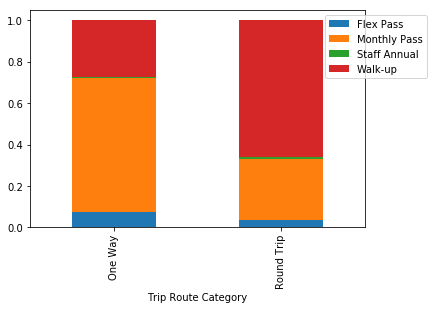

In [37]:
bike_plot = bike_grouped_proportion.unstack().plot(kind='bar', stacked=True)
bike_plot.legend(bbox_to_anchor=(1.2, 1))

<h3 align="center"> B3.4 </h3> 
Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of trips by passholder type and trip route category. Explain any outliers you observe

In [38]:
bike_share_trip.dtypes

Bike ID                              float64
Duration                               int64
End Time                              object
Ending Station ID                    float64
Ending Station Latitude              float64
Ending Station Longitude             float64
Passholder Type                       object
Plan Duration                        float64
Start Time                    datetime64[ns]
Starting Station ID                  float64
Starting Station Latitude            float64
Starting Station Longitude           float64
Trip ID                                int64
Trip Route Category                   object
dtype: object

In [39]:
bike_share_trip['Start Time'].dt.hour.head()

0     4
1     6
2    10
3    10
4    12
Name: Start Time, dtype: int64

Trip Route Category  Passholder Type
One Way              Flex Pass           2653
                     Monthly Pass       24570
                     Staff Annual          97
                     Walk-up             7510
Round Trip           Flex Pass            126
                     Monthly Pass        1056
                     Staff Annual          39
                     Walk-up             2129
dtype: int64


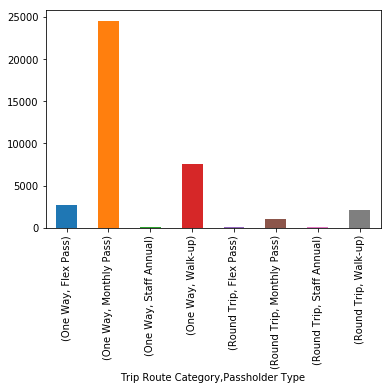

In [40]:
#bike_share_trip.query('Start Time')
morning_trips = bike_share_trip.loc[bike_share_trip['Start Time'].dt.hour < 12]
grouped_morning_trips = morning_trips.groupby(['Trip Route Category', 'Passholder Type']).size()
print(grouped_morning_trips)
grouped_morning_trips.plot(kind='bar')

In [41]:
grouped_morning_trips_proportion = grouped_morning_trips / morning_trips.shape[0]
print(grouped_morning_trips_proportion)


Trip Route Category  Passholder Type
One Way              Flex Pass          0.069487
                     Monthly Pass       0.643531
                     Staff Annual       0.002541
                     Walk-up            0.196700
Round Trip           Flex Pass          0.003300
                     Monthly Pass       0.027658
                     Staff Annual       0.001021
                     Walk-up            0.055762
dtype: float64


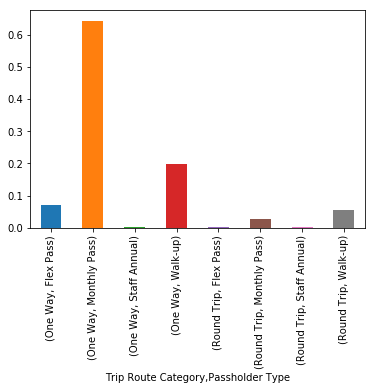

In [42]:
grouped_morning_trips_proportion.plot(kind='bar')

using loc instead of query, because column name contains spaces in it *alternatively we could have replaces column names with underscores everytime there is a space

<h3 align="center"> B3.5 </h3> 
Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by passholder type and trip route category. Present your results in a DataFrame which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [43]:
bike_share_trip['Start Time'].dt.hour.describe()

count    132427.000000
mean         14.069895
std           4.949172
min           0.000000
25%          11.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: Start Time, dtype: float64

In [59]:
#Seperate the hours of the day
start_time_hour = (bike_share_trip['Start Time'].dt.hour * 3600 + bike_share_trip['Start Time'].dt.minute * 60 + bike_share_trip['Start Time'].dt.second) / 3600.
median = start_time_hour.median()
print(median)

14.966666666666667


So median is 14.966, but since we want to have an integer we have to chose either 14 or 15. Let's calculate proportion for both of those cases

In [69]:
print(start_time_hour[start_time_hour.values <= 14].shape[0]/start_time_hour[start_time_hour.values > 14].shape[0])
start_time_hour[start_time_hour.values <= 15].shape[0]/start_time_hour[start_time_hour.values > 15].shape[0]

0.7822804231380044


1.0118651535177674

In [ ]:
#median = bike_share_trip['Start Time'].dt.hour.quantile(0.5)
print(median)

median_cut = pd.qcut((bike_share_trip['Start Time'].dt.hour * 60.0 + bike_share_trip['Start Time'].dt.minute)/60, 2)
print(median_cut.head())
print(median_cut.value_counts())


In [53]:
groups = bike_share_trip.groupby([median_cut, 'Passholder Type', 'Trip Route Category']).size() 
groups

Start Time       Passholder Type  Trip Route Category
(0.049, 14.967]  Flex Pass        One Way                 4610
                                  Round Trip               268
                 Monthly Pass     One Way                39274
                                  Round Trip              2060
                 Staff Annual     One Way                  183
                                  Round Trip                59
                 Walk-up          One Way                15698
                                  Round Trip              4182
(14.967, 23.95]  Flex Pass        One Way                 4424
                                  Round Trip               215
                 Monthly Pass     One Way                38258
                                  Round Trip              1712
                 Staff Annual     One Way                  116
                                  Round Trip                24
                 Walk-up          One Way                17079
 

In [46]:
groups_proportion = groups.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
#groups_proportion.set_index('Start Time')
groups_proportion

Start Time      Passholder Type  Trip Route Category
(-0.001, 14.0]  Flex Pass        One Way                0.069483
                                 Round Trip             0.004031
                Monthly Pass     One Way                0.592115
                                 Round Trip             0.031093
                Staff Annual     One Way                0.002753
                                 Round Trip             0.000888
                Walk-up          One Way                0.236668
                                 Round Trip             0.062969
(14.0, 23.0]    Flex Pass        One Way                0.066945
                                 Round Trip             0.003260
                Monthly Pass     One Way                0.578772
                                 Round Trip             0.025853
                Staff Annual     One Way                0.001759
                                 Round Trip             0.000364
                Walk-up          One 

start_time: The date/time when the trip began, presented in ISO 8601 format in local time
meaning that Date and time values are ordered from the largest to smallest unit of time, thus lexicographical order corresponds to the chronological order

__\* Briefly explain your approach for every query here \*__